In [2]:
import sys
import os
import fnmatch
import moviepy.editor as mp
import matplotlib.pyplot as plt
# import cv2
# from ffpyplayer.player import MediaPlayer
import scipy.io.wavfile
from scipy.signal import butter, lfilter
from scipy.signal import freqz
import numpy as np
from librosa import onset

%matplotlib qt

In [3]:

TEST_FILE_DIR = 'test-clips/greta-van-fleet'
VIDEO_TYPES = ['*.mp4']
AUDIO_TYPE = '.wav'
TMP_DIR = 'tmp'
if not os.path.exists(TMP_DIR):
    os.mkdir(TMP_DIR)
  


videos = []
audios = []
for fn in os.listdir(TEST_FILE_DIR):
    if any([fnmatch.fnmatch(fn, t) for t in VIDEO_TYPES]):
        print(f'loading {fn}')

        full_path = os.path.join(TEST_FILE_DIR, fn)
        clip = mp.VideoFileClip(full_path)
        videos.append(clip)

        # Save to temp audio file
        audio_fn = os.path.splitext(fn)[0] + AUDIO_TYPE
        audio_path = os.path.join(TMP_DIR, audio_fn)
        if os.path.exists(audio_path):
            print('Audio File already saved')
        else:
            print('Saving to temp path')
            clip.audio.write_audiofile(audio_path)
    
        # Read the Audio
        rate, data = scipy.io.wavfile.read(audio_path)
        ch1 = np.array([d[0] for d in data])
        ch2 = np.array([d[1] for d in data])

        ch1_float = ch1.astype(np.float32)
        if ch1.dtype == 'int16':
            ch1_float = ch1_float / (2 ** 15)

        audios.append({
            'data': ch1,
            'data_float': ch1_float,
            'rate': rate,
            'path': audio_path
        })

loading yt5s.com-Highway Tune-Greta Van Fleet-Red Rocks.mp4
Audio File already saved
loading yt5s.com-Greta Van Fleet - Highway Tune - 09-23-2019 Red Rocks.mp4
Audio File already saved
loading yt5s.com-Greta van Fleet at Red Rocks - Highway Tune.mp4
Audio File already saved


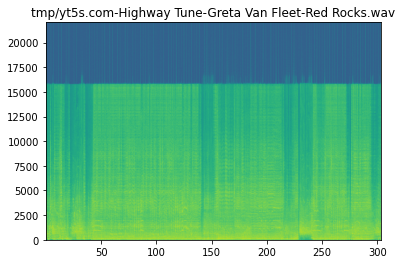

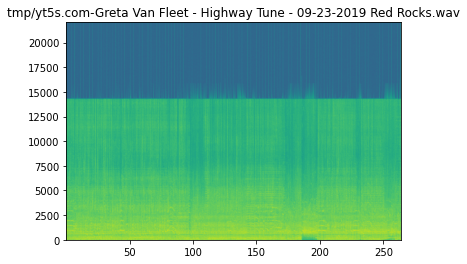

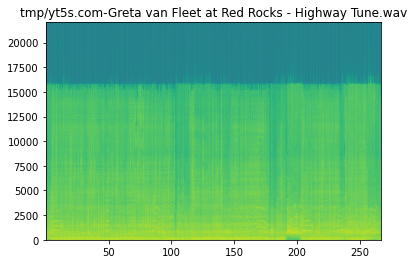

In [23]:
%matplotlib inline
for a in audios:
    plt.figure()
    plt.title(a['path'])
    plt.specgram(a['data'], NFFT=8192, Fs=a['rate'], noverlap=128)
plt.show()
%matplotlib qt

In [4]:


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [5]:
cutoff_freqs = [7500, 9000]

filtered_data = []
for a in audios:
    bandpass_data = butter_bandpass_filter(
        a['data'], 
        cutoff_freqs[0], 
        cutoff_freqs[1], 
        a['rate']
    )
    filtered_data.append(bandpass_data)

In [6]:
plt.figure()
for i, f in enumerate(filtered_data):
    norm_data = f / np.max(np.abs(f))
    
    duration = len(f) / audios[i]['rate']
    x = np.linspace(0, duration, len(f))
    plt.subplot(3, 1, i+1)
    plt.title(audios[i]['path'])
    plt.plot(x, norm_data)
#     plt.ylim(-20000, 20000)
plt.show()

tmp/yt5s.com-Highway Tune-Greta Van Fleet-Red Rocks.wav
tmp/yt5s.com-Greta Van Fleet - Highway Tune - 09-23-2019 Red Rocks.wav
tmp/yt5s.com-Greta van Fleet at Red Rocks - Highway Tune.wav


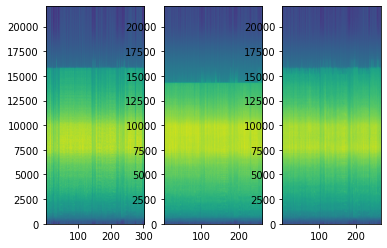

In [29]:
%matplotlib inline
plt.figure()
for i, f in enumerate(filtered_data):
    duration = len(f) / audios[i]['rate']
    x = np.linspace(0, duration, len(f))
    plt.subplot(1, 3, i+1)
    print(audios[i]['path'])
    plt.specgram(f, NFFT=8192, Fs=a['rate'], noverlap=128)
#     plt.ylim(-20000, 20000)
plt.show()
%matplotlib qt